<a href="https://colab.research.google.com/github/kzhkAKT/ApPhys2A/blob/main/4_6_1234_%E7%9B%B4%E6%B5%81%E5%9B%9E%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第二回目＋第三回目

- 4.6 直流回路
    - 4.6.1 抵抗の接続
    - 4.6.2 電池の起電力と内部抵抗
    - 4.6.3 電流計と電圧計
    - 4.6.4 キルヒホッフの法則

In [ ]:
#@title おまじない
! pip -qqq install schemdraw
#! pip show schemdraw
! pip -qqq install ziamath

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import schemdraw
import schemdraw.elements as elm

schemdraw.config(font='cmb10')
elm.style(elm.STYLE_IEC) # IEC/European style
#elm.style(elm.STYLE_IEEE) # IEEE style

#schemdraw.config(mathfont='cm')
#import matplotlib.pyplot as plt
#plt.xkcd()

# 4.6 直流回路

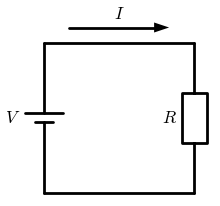

In [ ]:
#@title 基本還元回路

with schemdraw.Drawing(mathfont='cm') as d:
  elm.BatteryCell().down().label("$V$")
  elm.Line().right()
  elm.Resistor().up().label('$R$')
  L0=elm.Line().left()
  elm.CurrentLabel(top=False, ofst=.3).at(L0).label('$I$')

この小節で考えることは、
> 直列・並列・直並列の抵抗があっても、  
> 上記の **一つの回路に置き換えた** 場合の、**合成抵抗** $R$ を求める.

ことにある。直上の図では、
- 二本線で描かれたものは、 電池/Battery
  - マイナス(下流)からプラス(上流)に電流 $I~{\rm [A]}$ を引き上げるために、  
  電圧 $V~{\rm [V]}$ をもつ
- 四角い箱は、(欧州方式の) 抵抗 $R~{\rm [\Omega]}$
 - 高い電位 $V$ の状態(上流)から  
下の電位(この場合は $0~{\rm [V]}$, 下流)まで下げる  

- 定常電流が従う、オームの法則 $V=R\,I$ は成り立つものとする

---
電圧差 $V$ と電圧・電位の単位 ${\rm [V]}$ の違いに注意

## 4.6.1 抵抗の接続

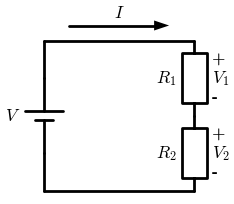

In [ ]:
#@title 直列接続
with schemdraw.Drawing(mathfont='cm') as d:
#  d += elm.Line().down()
  elm.Line(l=d.unit/4).down()
  elm.BatteryCell(l=d.unit/2).down().label("$V$")
  elm.Line(l=d.unit/4).down()
  elm.Line().right()
  elm.Resistor(l=d.unit/2).up().label('$R_2$').label(['-','$V_2$','+'], loc='bot')
  elm.Resistor(l=d.unit/2).up().label('$R_1$').label(['-','$V_1$','+'], loc='bot')
  L1=elm.Line().left()
  elm.CurrentLabel(top=False, ofst=.3).at(L1).label('$I$')

直列抵抗を持つ回路図より、オームの法則に従って、整理すると
\begin{align*}
&V = V_1 + V_2\\
&\begin{cases}
V_1 &= R_1\,I\\
V_2 &= R_2\,I
\end{cases}.
\end{align*}

これを一つの回路 $V = R_{\rm srs}\,I$ で表すことを考える。

代入して整理すると
\begin{align*}
\require{cancel}
R_{\rm srs}\,\bcancel{I}
&= R_1\,\bcancel{I}
 + R_2\,\bcancel{I}\\[2mm]
R_{\rm srs} &= R_1 + R_2
\end{align*}

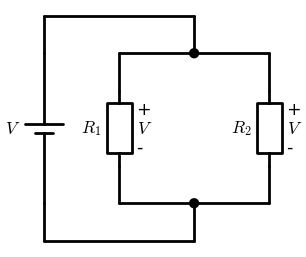

In [ ]:
#@title 並列接続
with schemdraw.Drawing(mathfont='cm') as d:
  elm.Line(l=d.unit/4).down()
  elm.BatteryCell().down().label("$V$")
  elm.Line(l=d.unit/4).down()
  elm.Line().right()
  elm.Line(l=d.unit/4).up()
  elm.Dot()
  d.push()
  elm.Line(l=d.unit/2).left()
  elm.Line(l=d.unit/4).up()
  elm.Resistor(l=d.unit/2).up().label('$R_1$').label(['-','$V$','+'], loc='bot')
  elm.Line(l=d.unit/4).up()
  elm.Line(l=d.unit/2).right()
  d.pop()
  #push
  elm.Line(l=d.unit/2).right()
  elm.Line(l=d.unit/4).up()
  elm.Resistor(l=d.unit/2).up().label('$R_2$').label(['-','$V$','+'], loc='bot')
  elm.Line(l=d.unit/4).up()
  elm.Line(l=d.unit/2).left()
  #pop
  elm.Dot()
  elm.Line(l=d.unit/4).up()
  elm.Line().left()

並列抵抗を持つ回路図より、オームの法則に従って、整理すると
\begin{align*}
&\begin{cases}
V &= R_1\,I_1\\
V &= R_2\,I_2
\end{cases}\\
&I = I_1 + I_2
\end{align*}.

これを一つの回路 $V = R_{\rm prl}\,I$ で表すことを考える。

代入して整理すると
\begin{align*}
\require{cancel}
\dfrac{\bcancel{V}}{R_{\rm prl}}
&= \dfrac{\bcancel{V}}{R_1}
 + \dfrac{\bcancel{V}}{R_2}\\[2mm]
\dfrac{1}{R_{\rm prl}}
&= \dfrac{1}{R_1} + \dfrac{1}{R_2}\\[2mm]
R_{\rm prl}
&= \left(\dfrac{1}{R_1} + \dfrac{1}{R_2}\right)^{-1}
= \dfrac{R_1\,R_2}{R_1 + R_2}
\end{align*}

### 直並列接続

## 4.6.2 電池の起電力と内部抵抗

電池も電荷を通す素材で出来ている為、電流が流れる時には、抵抗を生じます。  
このようなことが電池内部に存在する抵抗を、内部抵抗といいます。


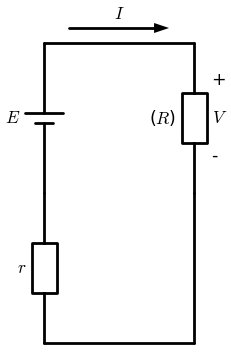

In [ ]:
#@title　起電力 $E$ と 内部抵抗 $r$
with schemdraw.Drawing(mathfont='cm') as d:
#  d += elm.Line().down()
  elm.BatteryCell().down().label("$E$")
  elm.Resistor().down().label('$r$')
  elm.Line().right()
  elm.Line().up()
  elm.Resistor().up().label('($R$)').label(['-','$V$','+'], loc='bot')
  L1=elm.Line().left()
  elm.CurrentLabel(top=False, ofst=.3).at(L1).label('$I$')

抵抗(R)に加わる[端子]電圧を $V$ とすると

\begin{align*}
E &= V + r\,I\\[2mm]
V &= E - r\,I
\end{align*}

$V=R\,I$ を代入すると
\begin{align*}
E &= R\,I + r\,I\\[2mm]
I = \dfrac{E}{R+r}
\end{align*}

In [ ]:
# @title 動画解説
%%html
<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/WXaQp4MyRTI?si=wWBNZR2O6LDkCT4H&amp;start=31" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## 4.6.3 電流計と電圧計

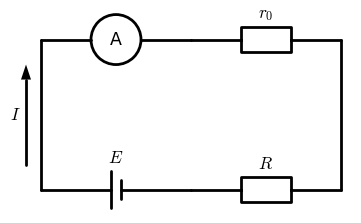

In [ ]:
# @title 電流計とその内部抵抗
with schemdraw.Drawing(mathfont='cm') as d:
  elm.BatteryCell().right().label('$E$')
  elm.Resistor().right().label('$R$')
  elm.Line().up()
  elm.Resistor().left().label('$r_0$')
  elm.MeterA().left()
  LA=elm.Line().down()
  elm.CurrentLabel(top=False, ofst=.3).at(LA).label('$I$')

\begin{align*}
E = r_0\,I + R\,I\\[2mm]
I = \dfrac{E}{r_0 + R}
\end{align*}

上式のように、電流計は流れを測定するので、直列に接続され、  
電流計の内部抵抗 $r_0$ が **大きい** と、回路に流れる電流 $I$ 変化する。

よって
> 電流の変化を最小にするため、  
電流計の内部抵抗 $r_0$ はできるだけ *小さくする*

ことが好ましい。

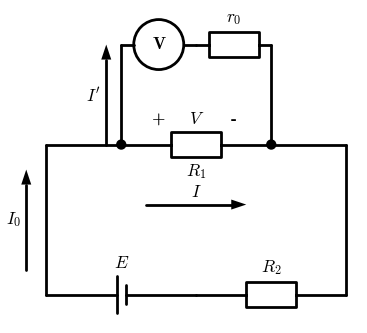

In [ ]:
# @title 電圧計とその内部抵抗
with schemdraw.Drawing(mathfont='cm') as d:
  elm.BatteryCell().right().label('$E$')
  elm.Resistor().right().label('$R_2$')
  elm.Line().up()
  elm.Line(l=d.unit*1/2).left()
  elm.Dot()
  R1=elm.Resistor().left().label('$R_1$', loc="bot").label(('-','$V$','+'))
#  elm.MeterA().left()
  elm.Dot()
  d.push()
  LtV=elm.Line(l=d.unit*2/3).up()
  elm.MeterV(l=d.unit*1/2).right()
  elm.Resistor(l=d.unit*1/2).right().label('$r_0$')
  elm.Line(l=d.unit*2/3).down()
  elm.CurrentLabel(top=True, ofst=.3).at(LtV).label("$I'$")
  d.pop()
  elm.Line(l=d.unit*1/2).left()
  L0=elm.Line().down()
  elm.CurrentLabel(top=False, ofst=.4).at(L0).label('$I_0$')
  elm.CurrentLabel(top=False, ofst=-1.2).at(R1).label('$I$')

電圧計は並列に接続されるため、回路が枝分かれするところで、電流が分岐する。  
\begin{align*}
I_0 = I + I'
\end{align*}

$R_1$ と $r_0$ を含む並列抵抗の合成抵抗は
\begin{align*}
\dfrac{1}{R} = \dfrac{1}{R_1} + \dfrac{1}{r_0}
\end{align*}
で $r_0$ が **十分大きい** と $R \approx R_1$ とみなせる。  

このとき、$I'(=V/r_0)$ は *小さく* なり、測定したい回路の電流も $I_0\approx I$ となる。

従って
> 電圧計に流れ込む電流を抑えるためには、  
電流計の内部抵抗をできるだけ大きくする

ことが好ましい。


## 4.6.4 キルヒホッフの法則

[Gustav Kirchhoff](https://en.wikipedia.org/wiki/Gustav_Kirchhoff) は、
[Ohm's law](https://en.wikipedia.org/wiki/Ohm%27s_law) を電気回路網に拡張し、次の二つの定理をまとめた。

## 第一法則

### 電流則

実は電圧計を議論するときに使っています。

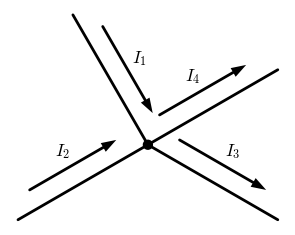

In [ ]:
# @title Kirchhoff's current law(KCL)
with schemdraw.Drawing(mathfont='cm') as d:
  L1=elm.Line().theta(30)
  elm.Dot()
  d.push()
  L2=elm.Line().theta(30)
  d.pop()
  d.push()
  L3=elm.Line().theta(-30)
  d.pop()
  L4=elm.Line().theta(120)
  elm.CurrentLabel(top=True, ofst=0.4).at(L1).label('$I_2$')
  elm.CurrentLabel(top=True, ofst=0.4, l=d.unit*1.8).at(L2).label('$I_4$')
  elm.CurrentLabel(top=True, ofst=0.4).at(L3).label('$I_3$')
  elm.CurrentLabel(top=True, ofst=0.4).at(L4).label('$I_1$')

\begin{align*}
I_1 + I_2 &= I_3 + I_4
\end{align*}

> 回路網の任意の接続点へ向かって流入する電流の総和と、  
その接続点から流出する電流の総和は等しい


見方を変えると
\begin{align*}
I_1 + I_2 &= I_3 + I_4\\[1mm]
&I_1 + I_2 + (-I_3) + (-I_4) =0 \\[1mm]
&\color{red}{I'_1} + \color{red}{I'_2}
 + \color{blue}{I'_3} + \color{blue}{I'_4} = 0 \\[2mm]
 \sum_{k=1}^{4} I'_k &=0
\end{align*}

> 回路網の任意の接続点に注目し、  
そこへ流入する(正の)電流と流出する(負の)電流の総和は  
ゼロになる

## 第二法則

### 電圧則

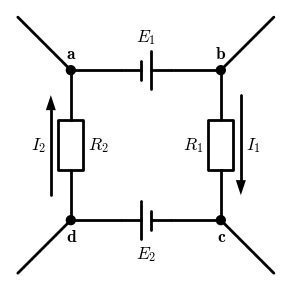

In [ ]:
# @title Kirchhoff's voltage law(KVL)
with schemdraw.Drawing(mathfont='cm') as d:
  elm.Line(l=d.unit*1/2).theta(-45)
  elm.Dot().label("a")
  d.push()
  elm.Line(l=d.unit*1/3).theta(0)
  E1=elm.BatteryCell(l=d.unit*1/3).reverse().theta(0).label("$E_1$",loc="top")
  elm.Line(l=d.unit*1/3).theta(0)
  d.pop()
  elm.Line(l=d.unit*1/3).theta(-90)
  R2=elm.Resistor(l=d.unit*1/3).theta(-90).label("$R_2$",loc="bot")
  elm.Line(l=d.unit*1/3).theta(-90)
  d.push()
  elm.Dot().label("d",loc="bot")
  elm.Line(l=d.unit*1/2).theta(-135)
  d.pop()
  elm.Line(l=d.unit*1/3).theta(0)
  E2=elm.BatteryCell(l=d.unit*1/3).theta(0).label("$E_2$",loc="bot")
  elm.Line(l=d.unit*1/3).theta(0)
  d.push()
  elm.Dot().label("c", loc="bot")
  elm.Line(l=d.unit*1/3).theta(90)
  R1=elm.Resistor(l=d.unit*1/3).theta(90).label("$R_1$")
  elm.Line(l=d.unit*1/3).theta(90)
  elm.Dot().label("b")
  elm.Line(l=d.unit*1/2).theta(45)
  d.pop()
  elm.Line(l=d.unit*1/2).theta(-45)
  elm.CurrentLabel(top=False, ofs=.3).at(R2).label('$I_2$',loc="top")
  elm.CurrentLabel(top=False, ofs=.3).at(R1).label('$I_1$',loc="bot")

経路 a $\to$ b $\to$ c $\to$ d ($\to$a )   
[上図では a から出発し時計回り]
\begin{align*}
E_1 + E_2 = R_1\, I_1 + R_2\, I_2
\end{align*}

> 電気回路網に閉じた(方向を有する)経路を考慮したとき、  
その経路に沿った起電力(電力上昇)の総和と、  
同じ経路上の抵抗(等)による電圧降下の総和は、等しくなる。

- 選択した経路の方向と同じ向きに電位が大きくなるとき正の起電力
  - 逆であれば負の起電力
- 選択した経路の方向と同じ向きに進んだときに、  
電圧降下が起こる時は、正の電圧降下
  - 逆であれば負の電圧降下

見方を変えると
\begin{align*}
E_1 + E_2 = R_1\, I_1 + R_2\, I_2\\[1mm]
E_1 + E_2 + (- R_1\, I_1) + (- R_2\, I_2) =0
\end{align*}

> 一周回って戻ったら、電圧上昇と降下を経て、  
 出発時点の元の電圧になる。  
 つまり電圧変化はゼロ

 と表現できる